In [1]:
!pip install tvb-data
!pip install -U tvb-library

Requirement already up-to-date: tvb-library in /opt/conda/lib/python3.6/site-packages (2.0.2)
Requirement already up-to-date: hbp-service-client in /opt/conda/lib/python3.6/site-packages (1.1.1)


### Note to the users
#### If you are planning to create your own exploratory examples, please do not modify the original document, but create your personal copy that you can can edit.

In [2]:
%matplotlib inline
%pylab inline
from tvb.simulator.lab import *
from matplotlib.pyplot import *
import numpy

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


# Simulation with the reduced Wong-Wang model

Gustavo et al and Hansen et al 2015 used the reduced Wong-Wang model to reproduce certain aspects of human resting state fMRI. This is a 1D model, so we can tune its parameters simply by plotting the derivative as a function of the state variable:

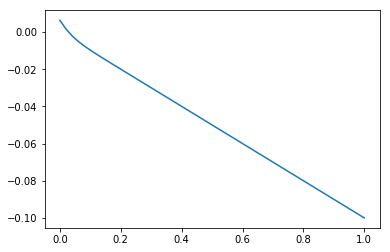

In [4]:
rww = models.ReducedWongWangExcInh()
S = numpy.linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

figure()
plot(S.flat, dS.flat)

And a short simulation

  ERROR  Could not import tvb_data Python module for default data-set!
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tvb/basic/readers.py", line 226, in try_get_absolute_path
    module_import = importlib.import_module(relative_module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 941, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'tvb_data'
WARNING  File 'hemispheres' not f

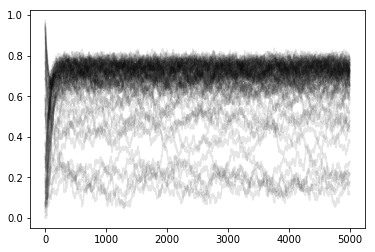

In [5]:
sim = simulator.Simulator(
    model=rww,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([1e-5]))), 
    monitors=[monitors.TemporalAverage(period=1.)],
    simulation_length=5e3
).configure()

(time, data), = sim.run()

figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

## References

[DPA_2013]     Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, Patric Hagmann and Maurizio Corbetta. Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations. The Journal of Neuroscience 32(27), 11239-11252, 2013.